In [712]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [713]:
current_dir = os.getcwd()
path_file = os.path.join(current_dir, "datasets/defects_data.csv")
data = pd.read_csv(path_file, header=0)

In [714]:
data.head()

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [715]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [716]:
# Análise exploratória

# Distribuição de Classes Severity
severity_counts = data['severity'].value_counts()
print(severity_counts)

severity
Minor       358
Critical    333
Moderate    309
Name: count, dtype: int64


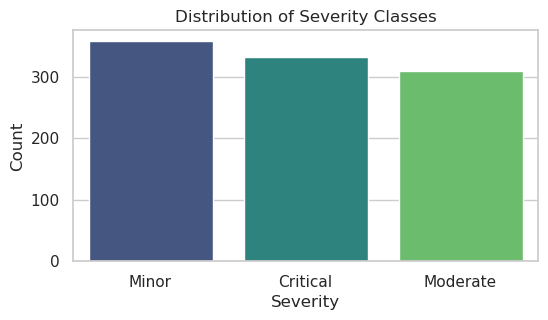

In [717]:
plt.figure(figsize=(6, 3))
sns.barplot(x=severity_counts.index, y=severity_counts.values, hue=severity_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Severity Classes')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

In [718]:
# Verificando valores nulos
missing_values = data.isnull().sum()
print(missing_values)

defect_id            0
product_id           0
defect_type          0
defect_date          0
defect_location      0
severity             0
inspection_method    0
repair_cost          0
dtype: int64


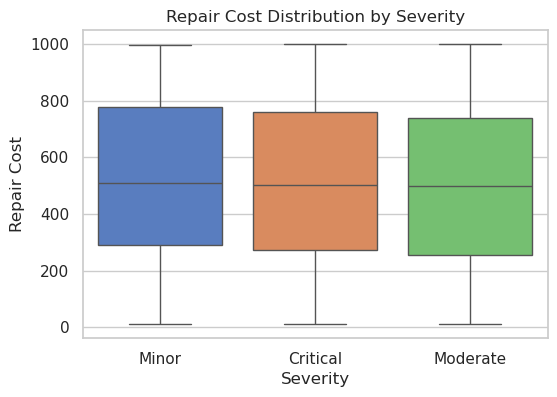

In [719]:
# Relação entre repair_cost e severity
plt.figure(figsize=(6, 4))
sns.boxplot(x='severity', y='repair_cost', data=data, hue='severity', palette='muted', legend=False)
plt.title('Repair Cost Distribution by Severity')
plt.xlabel('Severity')
plt.ylabel('Repair Cost')
plt.show()

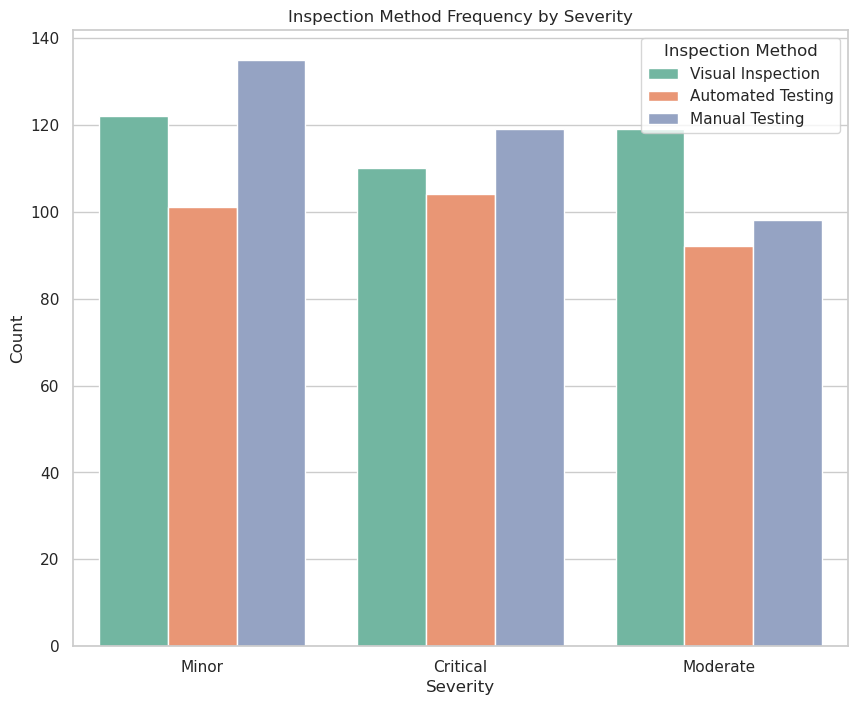

In [720]:
# Explorando a frequência do 'inspection_method' para cada nível de severidade
plt.figure(figsize=(10, 8))
sns.countplot(x='severity', hue='inspection_method', data=data, palette='Set2')
plt.title('Inspection Method Frequency by Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.legend(title='Inspection Method', loc='upper right')
plt.show()

Distribuição de Custos de Reparação:

Defeitos classificados como "Critical" tendem a apresentar uma maior variabilidade no custo de reparação.
Custos mais baixos predominam em defeitos "Minor".

Métodos de Inspeção:

A inspeção visual é a mais utilizada em todas as categorias de severidade.
"Automated Testing" e "Manual Testing" são mais frequentes em defeitos "Critical"

In [721]:
X = data[['defect_type', 'defect_location', 'inspection_method']]
y = data['severity']

In [722]:
ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X).toarray()

In [723]:
encoded_columns = ohe.get_feature_names_out(input_features=X.columns)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_columns)

In [724]:
X = X_encoded

In [725]:
y = y.map({'Minor': 0, 'Moderate': 1, 'Critical': 2})

In [726]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=0)
X_train_75, X_test_25, y_train_75, y_test_25 = train_test_split(X, y, test_size=0.25, random_state=0)

In [727]:
svm_clf = svm.SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
cv_scores = cross_val_score(svm_clf, X, y, cv=5, scoring='accuracy')

In [728]:
svm_clfl_70 = svm.SVC(kernel='linear', probability=True, random_state=42)
svm_clfl_70.fit(X_train_70, y_train_70)
cv_scores_70 = cross_val_score(svm_clfl_70, X_train_70, y_train_70, cv=5, scoring='accuracy')

In [729]:
svm_clfl_75 = svm.SVC(kernel='linear', probability=True, random_state=42)
cv_scores_75 = cross_val_score(svm_clfl_75, X_train_75, y_train_75, cv=5, scoring='accuracy')
svm_clfl_75.fit(X_train_75, y_train_75)

SVC(kernel='linear', probability=True, random_state=42)

In [730]:
y_pred = svm_clf.predict(X_test)
y_train_pred = svm_clf.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [731]:
y_train_pred_70 = svm_clfl_70.predict(X_train_70)
y_test_pred_30 = svm_clfl_70.predict(X_test_30)
train_accuracy_70 = accuracy_score(y_train_70, y_train_pred_70)
test_accuracy_30 = accuracy_score(y_test_30, y_test_pred_30)

In [732]:
y_train_pred_75 = svm_clfl_75.predict(X_train_75)
y_test_pred_25 = svm_clfl_75.predict(X_test_25)
train_accuracy_75 = accuracy_score(y_train_75, y_train_pred_75)
test_accuracy_25 = accuracy_score(y_test_25, y_test_pred_25)

In [733]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
993,0,2
859,1,0
298,0,2
553,2,1
672,0,0


In [734]:
print(f"Acurácia no treino (80% treino): {train_accuracy:.2f}")
print(f"Acurácia no teste (20% teste): {accuracy:.2f}")
print(f"Acurácia no treino (70% treino): {train_accuracy_70:.2f}")
print(f"Acurácia no teste (30% teste): {test_accuracy_30:.2f}")
print(f"Acurácia no treino (75% treino): {train_accuracy_75:.2f}")
print(f"Acurácia no teste (25% teste): {test_accuracy_25:.2f}")

Acurácia no treino (80% treino): 0.37
Acurácia no teste (20% teste): 0.29
Acurácia no treino (70% treino): 0.38
Acurácia no teste (30% teste): 0.30
Acurácia no treino (75% treino): 0.38
Acurácia no teste (25% teste): 0.32


In [735]:
# Dados das acurácias de treino e teste
accuracy_data = {
    'Dataset': ['Treino (80% treino)', 'Teste (20% teste)', 'Treino (70% treino)', 'Teste (30% teste)', 'Treino (75% treino)', 'Teste (25% teste)'],
    'Acurácia': [train_accuracy, accuracy, train_accuracy_70, test_accuracy_30, train_accuracy_75, test_accuracy_25]
}

# Criar DataFrame
accuracy_df = pd.DataFrame(accuracy_data)

# Estilizar a tabela
accuracy_df_styled = accuracy_df.style.set_caption("Acurácias de Treino e Teste").format({
    'Acurácia': '{:.2f}'
})

# Exibir a tabela no notebook
accuracy_df_styled

,Dataset,Acurácia
0,Treino (80% treino),0.37
1,Teste (20% teste),0.29
2,Treino (70% treino),0.38
3,Teste (30% teste),0.30
4,Treino (75% treino),0.38
5,Teste (25% teste),0.32


In [736]:
mse = mean_squared_error(y_test, y_pred)
print('Erro quadratico medio (MSE): ', mse)

Erro quadratico medio (MSE):  1.53


In [737]:
mae = mean_absolute_error(y_test, y_pred)
print('Erro absoluto medio (MAE): ', mae)

Erro absoluto medio (MAE):  0.98


In [738]:
print(f'Validação cruzada (80% treino) - Acurácia média: {cv_scores.mean()}')
print(f'Desvio padrão da acurácia (80% treino): {cv_scores.std()}')
print(f'Validação cruzada (70% treino) - Acurácia média: {cv_scores_70.mean()}')
print(f'Desvio padrão da acurácia (70% treino): {cv_scores_70.std()}')
print(f'Validação cruzada (75% treino) - Acurácia média: {cv_scores_75.mean()}')
print(f'Desvio padrão da acurácia (75% treino): {cv_scores_75.std()}')

Validação cruzada (80% treino) - Acurácia média: 0.32899999999999996
Desvio padrão da acurácia (80% treino): 0.017720045146669347
Validação cruzada (70% treino) - Acurácia média: 0.33999999999999997
Desvio padrão da acurácia (70% treino): 0.030838618778461297
Validação cruzada (75% treino) - Acurácia média: 0.32933333333333337
Desvio padrão da acurácia (75% treino): 0.016110727964792754


In [739]:
# Dados das métricas de validação cruzada
cv_data = {
    'Dataset': ['Validação Cruzada (80% treino)', 'Validação Cruzada (70% treino)', 'Validação Cruzada (75% treino)'],
    'Acurácia Média': [cv_scores.mean(), cv_scores_70.mean(), cv_scores_75.mean()],
    'Desvio Padrão': [cv_scores.std(), cv_scores_70.std(), cv_scores_75.std()]
}

# Criar DataFrame
cv_df = pd.DataFrame(cv_data)

# Exibir a tabela
cv_df_styled = cv_df.style.set_caption("Métricas de Validação Cruzada").format({
    'Acurácia Média': '{:.4f}',
    'Desvio Padrão': '{:.4f}'
})

# Exibir a tabela no notebook
cv_df_styled

,Dataset,Acurácia Média,Desvio Padrão
0,Validação Cruzada (80% treino),0.3290,0.0177
1,Validação Cruzada (70% treino),0.3400,0.0308
2,Validação Cruzada (75% treino),0.3293,0.0161


In [740]:
target_names = ['Minor', 'Moderate', 'Critical']
report = classification_report(y_test, y_pred, target_names=target_names, zero_division=0)
print(report)

              precision    recall  f1-score   support

       Minor       0.38      0.47      0.42        76
    Moderate       0.17      0.10      0.12        62
    Critical       0.25      0.27      0.26        62

    accuracy                           0.29       200
   macro avg       0.26      0.28      0.27       200
weighted avg       0.27      0.29      0.28       200



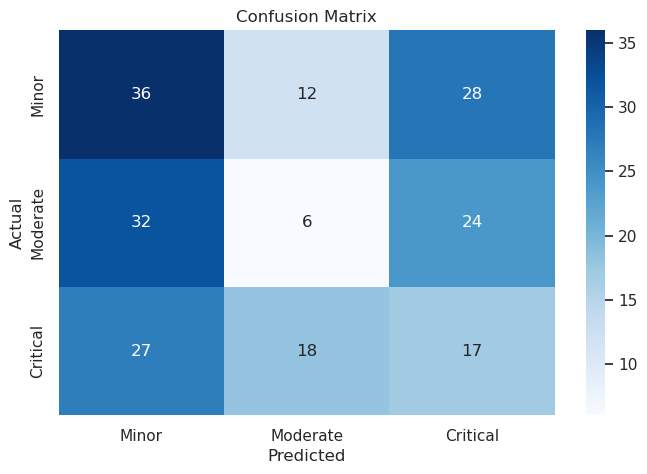

In [741]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
class_labels = ['Minor', 'Moderate', 'Critical']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()